# Example 1 - Parallel Inclined Layers

This example will show how to convert the geological map below to a `GemPy` model. This example is based on digitized data. The area is 972 m wide (W-E extent) and 1069 m high (N-S extent). 
<img src="../../data/Test1/task1.png" width="300">

# Importing Libraries

In [1]:
import sys
sys.path.append('../../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load Data

In [2]:
base_map = rasterio.open('../../../gemgis/data/examples/example1/task1.tif')
interfaces = gpd.read_file('../../../gemgis/data/examples/example1/interfaces1_lines.shp')
orientations = gpd.read_file('../../../gemgis/data/examples/example1/orientations1.shp')
extent = gpd.read_file('../../../gemgis/data/examples/example1/extent1.shp')
geological_map = gpd.read_file('../../../gemgis/data/examples/example1/geolmap1.shp')
topo = gpd.read_file('../../../gemgis/data/examples/example1/topo1.shp')
custom_section = gpd.read_file('../../../gemgis/data/examples/example1/customsections1.shp')

# Inspect Data

In [3]:
interfaces.head()

id formation                                           geometry
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....
1  None       Ton  LINESTRING (0.188 495.787, 8.841 504.142, 41.0...
2  None       Ton  LINESTRING (970.677 833.053, 959.372 800.023, ...

In [4]:
orientations.head()

id formation   dip  azimuth                 geometry
0  None       Ton  30.5    180.0   POINT (96.471 451.564)
1  None       Ton  30.5    180.0  POINT (172.761 661.877)
2  None       Ton  30.5    180.0  POINT (383.074 957.758)
3  None       Ton  30.5    180.0  POINT (592.356 722.702)
4  None       Ton  30.5    180.0  POINT (766.586 348.469)

In [5]:
extent.head()

id                                           geometry
0  None  POLYGON ((-0.000 1069.000, 972.000 1069.000, 9...

In [6]:
geological_map.head()

id formation                                           geometry
0  None     Sand1  POLYGON ((0.256 264.862, 10.593 276.734, 17.13...
1  None       Ton  POLYGON ((0.256 264.862, 0.188 495.787, 8.841 ...
2  None     Sand2  POLYGON ((0.188 495.787, 0.249 1068.760, 278.5...
3  None     Sand2  POLYGON ((511.675 1068.852, 971.698 1068.800, ...

In [7]:
topo.head()

id    Z                                           geometry
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....
1  None  300  LINESTRING (645.965 0.525, 685.141 61.866, 724...
2  None  400  LINESTRING (490.292 0.525, 505.756 40.732, 519...
3  None  600  LINESTRING (911.433 1068.585, 908.856 1026.831...
4  None  700  LINESTRING (228.432 1068.585, 239.772 1017.037...

In [8]:
custom_section.head()

id   section                                     geometry
0  None  Section1  LINESTRING (1.372 383.979, 970.995 383.883)

# Create GemPy Data Class

In [9]:
geo_data = gg.GemPyData(model_name='Model1', 
                        crs='EPSG:4326')

In [10]:
vars(geo_data)

{'model_name': 'Model1',
 'crs': 'EPSG:4326',
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'faults': None,
 'is_fault': None}

# Set Extent

In [11]:
geo_data.set_extent(gdf=extent, minz=300, maxz=800)
geo_data.extent

[-0.0, 972.0, -0.0, 1069.0, 300, 800]

# Set Resolution

In [12]:
geo_data.set_resolution(50,50,50)
geo_data.resolution

[50, 50, 50]

# Loading Layer Style

In [13]:
cols = gg.utils.load_surface_colors('../../../gemgis/data/examples/example1/style1.qml', geological_map)
cols

['#b35a2a', '#b35a2a', '#525252']

# Plot Data

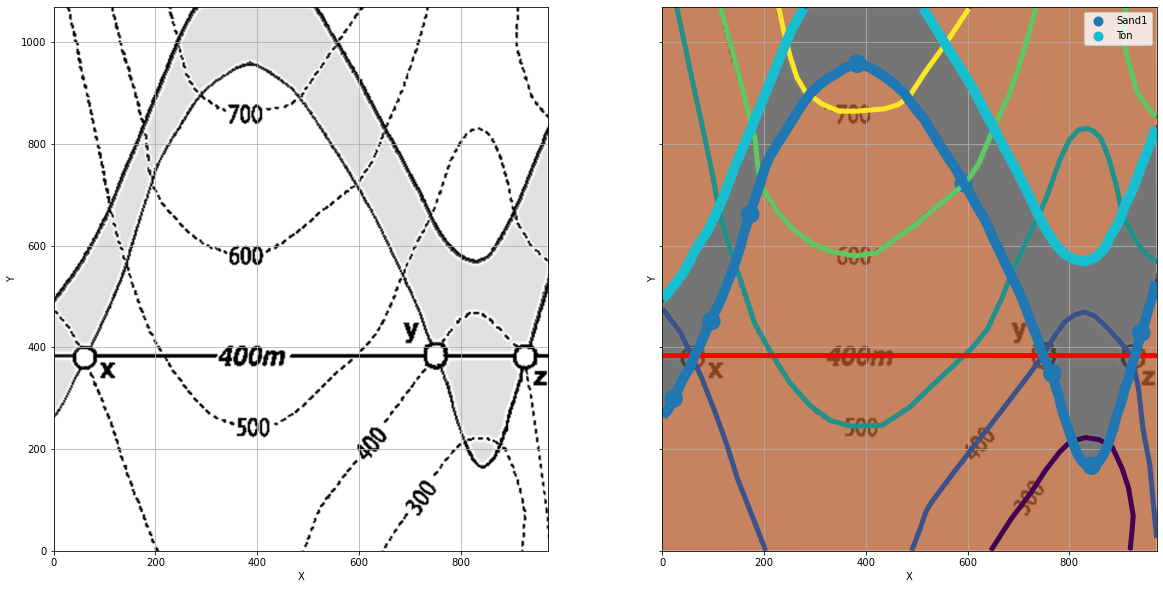

In [14]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
geological_map.plot(ax=ax2, column = 'formation', alpha=0.75, legend=True, cmap=ListedColormap(cols))
topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5)
custom_section.plot(ax=ax2, legend = False, linewidth = 5,color='red')
interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
orientations.plot(ax=ax2, column = 'formation', legend = False, s = 300)

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1]);

# Interpolate Topography

In [15]:
dem = gg.vector.interpolate_raster(topo, method='rbf')
dem

array([[411.82014581, 411.69052091, 411.56158939, ..., 384.04962954,
        385.42140506, 386.76248969],
       [411.66101945, 411.5316941 , 411.40306465, ..., 384.4299191 ,
        385.80964238, 387.15718098],
       [411.5023835 , 411.37335931, 411.24503355, ..., 384.8252337 ,
        386.21293421, 387.56684012],
       ...,
       [499.18752484, 499.15158818, 499.11692808, ..., 624.97739453,
        625.38574125, 625.79305697],
       [499.53566482, 499.49887905, 499.4633306 , ..., 625.17315916,
        625.58165735, 625.98912699],
       [499.90110024, 499.86421238, 499.82858152, ..., 625.37307284,
        625.78164892, 626.18920124]])

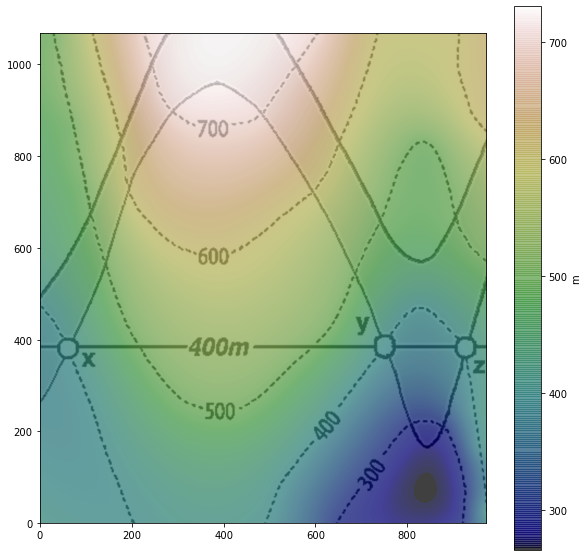

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
im = plt.imshow(dem,origin = 'lower', alpha=0.75, cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('m')

# Save Topography as Raster

In [17]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example1/topo.tif',dem, crs='EPSG:4326', extent=geo_data.extent)

In [18]:
topography = rasterio.open('../../../gemgis/data/examples/example1/topo.tif')
topography

<open DatasetReader name='../../../gemgis/data/examples/example1/topo.tif' mode='r'>

# Set Interfaces

In [19]:
interfaces_coords = gg.vector.extract_coordinates(interfaces,np.flipud(dem), extent=geo_data.extent)
interfaces_coords.head()

id formation                                           geometry  \
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   

                                    points          X           Y           Z  
0  (0.256327195431048, 264.86214748436396)   0.256327  264.862147  387.237352  
0  (10.59346813871597, 276.73370778641777)  10.593468  276.733708  387.150968  
0   (17.134940141888464, 289.089821570188)  17.134940  289.089822  387.379871  
0   (19.150128045807676, 293.313485355882)  19.150128  293.313485  387.523852  
0    (27.79511673965105, 310.571692592952)  27.795117  310.571693  388.627026

In [20]:
geo_data.to_gempy_df(interfaces_coords, 'interfaces')
geo_data.interfaces.head()

index          X           Y           Z formation
0      0   0.256327  264.862147  387.237352     Sand1
1      0  10.593468  276.733708  387.150968     Sand1
2      0  17.134940  289.089822  387.379871     Sand1
3      0  19.150128  293.313485  387.523852     Sand1
4      0  27.795117  310.571693  388.627026     Sand1

# Set Orientations

In [21]:
orientations_coords = gg.vector.extract_coordinates(orientations,np.flipud(dem),extent=geo_data.extent)
orientations_coords.head()

id formation   dip  azimuth                 geometry           X  \
0  None       Ton  30.5    180.0   POINT (96.471 451.564)   96.471041   
1  None       Ton  30.5    180.0  POINT (172.761 661.877)  172.761009   
2  None       Ton  30.5    180.0  POINT (383.074 957.758)  383.073893   
3  None       Ton  30.5    180.0  POINT (592.356 722.702)  592.355831   
4  None       Ton  30.5    180.0  POINT (766.586 348.469)  766.585622   

            Y           Z  
0  451.563621  441.094095  
1  661.876505  556.867380  
2  957.757866  722.911087  
3  722.702290  601.566862  
4  348.469070  378.006473

In [22]:
geo_data.to_gempy_df(orientations_coords, 'orientations')
geo_data.orientations.head()

index           X           Y           Z formation   dip  azimuth  \
0      0   96.471041  451.563621  441.094095       Ton  30.5    180.0   
1      1  172.761009  661.876505  556.867380       Ton  30.5    180.0   
2      2  383.073893  957.757866  722.911087       Ton  30.5    180.0   
3      3  592.355831  722.702290  601.566862       Ton  30.5    180.0   
4      4  766.585622  348.469070  378.006473       Ton  30.5    180.0   

   polarity  
0         1  
1         1  
2         1  
3         1  
4         1

# Check Data Class

In [23]:
vars(geo_data)

{'model_name': 'Model1',
 'crs': 'EPSG:4326',
 'extent': [-0.0, 972.0, -0.0, 1069.0, 300, 800],
 'resolution': [50, 50, 50],
 'interfaces':      index           X            Y           Z formation
 0        0    0.256327   264.862147  387.237352     Sand1
 1        0   10.593468   276.733708  387.150968     Sand1
 2        0   17.134940   289.089822  387.379871     Sand1
 3        0   19.150128   293.313485  387.523852     Sand1
 4        0   27.795117   310.571693  388.627026     Sand1
 ..     ...         ...          ...         ...       ...
 126      2  636.023304   859.787827  616.957320       Ton
 127      2  608.850959   912.396263  647.222983       Ton
 128      2  560.109925   990.617267  696.542521       Ton
 129      2  526.375318  1045.388234  716.806593       Ton
 130      2  512.239649  1067.950829  721.319470       Ton
 
 [131 rows x 5 columns],
 'orientations':    index           X           Y           Z formation   dip  azimuth  \
 0      0   96.471041  451.563621  4

# Add Section Dict

In [24]:
geo_data.to_section_dict(custom_section, 'section')
geo_data.section_dict

{'Section1': ([1.372395262185787, 383.9794474025771],
  [970.9954955186289, 383.8831909730347],
  [100, 80])}

# Add Surface Colors

In [25]:
geo_data.to_surface_color_dict('../../../gemgis/data/examples/example1/style1.qml', basement='Sand2')
geo_data.surface_colors

{'Sand1': '#b35a2a', 'Ton': '#525252', 'basement': '#b35a2a'}

# Add Stack

In [26]:
geo_data.stack = {"Strat_Series": ('Sand1', 'Ton')}
geo_data.stack

{'Strat_Series': ('Sand1', 'Ton')}

# Add DEM

In [27]:
geo_data.dem = '../../../gemgis/data/examples/example1/raster1.tif'
geo_data.dem

'../../../gemgis/data/examples/example1/raster1.tif'

# Visualize Data Set

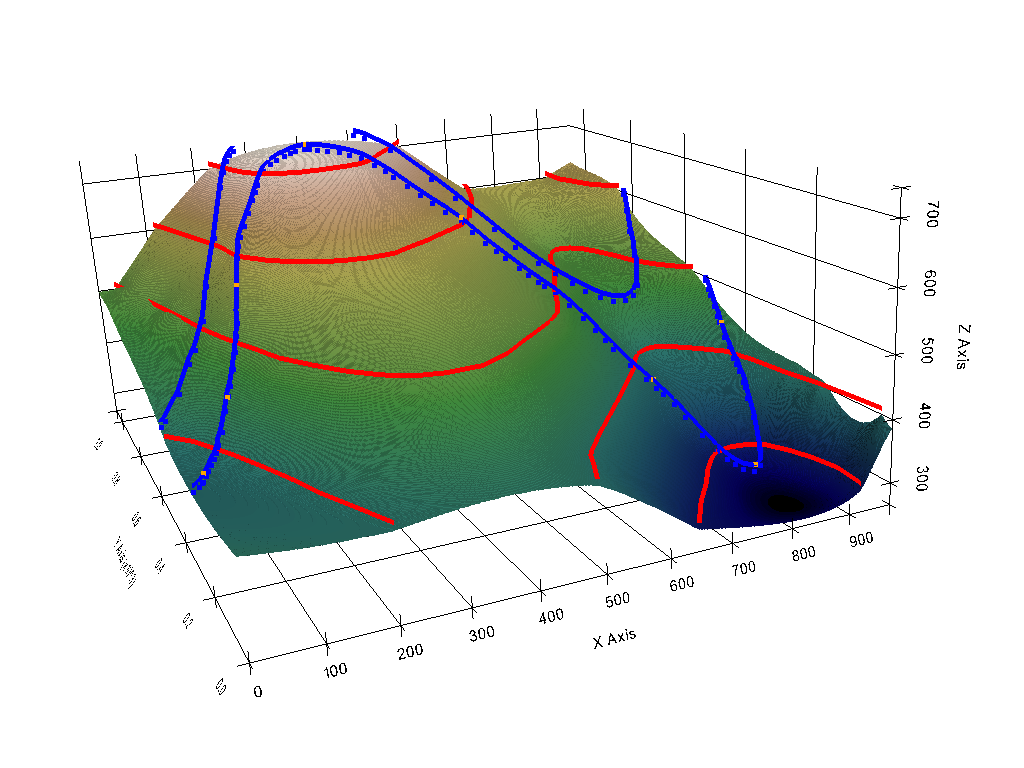

In [28]:
import pyvista as pv
p = pv.Plotter(notebook =True)
gg.visualization.plot_dem_3d(dem, p, cmap = 'gist_earth')
gg.visualization.plot_contours_3d(topo, p, color = 'red', add_to_z = 10)
gg.visualization.plot_points_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)
gg.visualization.plot_points_3d(orientations_coords, p, color = 'orange', add_to_z = 20)
gg.visualization.plot_contours_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]
p.set_background('white')
p.show_grid(color='black')
p.show()

# Create GemPy Model

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [29]:
import sys  
sys.path.append('../../../gempy-master')
import gempy as gp
print(gp)
print(gp.__version__)

<module 'gempy' from '../../../gempy-master\\gempy\\__init__.py'>
2.2.2


## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [30]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

Model1  2020-07-30 19:27

In [31]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


Model1  2020-07-30 19:27

In [32]:
geo_model.surfaces

surface          series  order_surfaces    color  id
0   Sand1  Default series               1  #015482   1
1     Ton  Default series               2  #9f0052   2

In [33]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

surface        series  order_surfaces    color  id
0     Sand1  Strat_Series               1  #015482   1
1       Ton  Strat_Series               2  #9f0052   2
2  basement  Strat_Series               3  #ffbe00   3

In [34]:
geo_model.surfaces.colors.change_colors(geo_data.surface_colors)

surface        series  order_surfaces    color  id
0     Sand1  Strat_Series               1  #b35a2a   1
1       Ton  Strat_Series               2  #525252   2
2  basement  Strat_Series               3  #b35a2a   3

A raster created with ArcGIS has to be loaded as the import of the created raster fails. This is due to a bug in `GemPy`described here: https://github.com/cgre-aachen/gempy/issues/492

In [35]:
geo_model.set_topography(
    source='gdal', filepath='../../../gemgis/data/examples/example1/raster1.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[   9.72      ,   10.69      ,  305.        ],
       [   9.72      ,   10.69      ,  315.        ],
       [   9.72      ,   10.69      ,  325.        ],
       ...,
       [ 970.056     , 1059.28181818,  622.0892334 ],
       [ 970.056     , 1063.16909091,  622.06713867],
       [ 970.056     , 1067.05636364,  622.05786133]])

In [36]:
geo_model.set_section_grid(geo_data.section_dict)

Active grids: ['regular' 'topography' 'sections']


start                                    stop resolution        dist
Section1  [1.372395262185787, 383.9794474025771]  [970.9954955186289, 383.8831909730347]  [100, 80]  969.623105

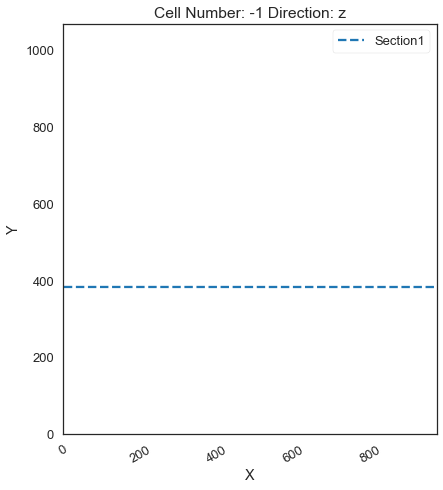

In [37]:
gp.plot.plot_section_traces(geo_model)

In [38]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range             1528.9
$C_o$            55655.8
drift equations      [3]


In [40]:
sol = gp.compute_model(geo_model, compute_mesh=True)

../../../gempy-master\gempy\core\solution.py:315: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:0
  '; Surface Number:' + str(s_n))
../../../gempy-master\gempy\core\solution.py:315: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:1
  '; Surface Number:' + str(s_n))


In [41]:
geo_model.surfaces.df

surface        series  order_surfaces  isBasement isFault  isActive  \
0     Sand1  Strat_Series               1       False   False      True   
1       Ton  Strat_Series               2       False   False      True   
2  basement  Strat_Series               3        True   False      True   

   hasData    color vertices edges      sfai  id  
0     True  #b35a2a      NaN   NaN  0.510641   1  
1     True  #525252      NaN   NaN  0.462943   2  
2     True  #b35a2a      NaN   NaN       NaN   3

The geological map had to be created manually as there seems to be a bug when creating the geological map with `GemGIS`. This was reported already: https://github.com/cgre-aachen/gempy/issues/446

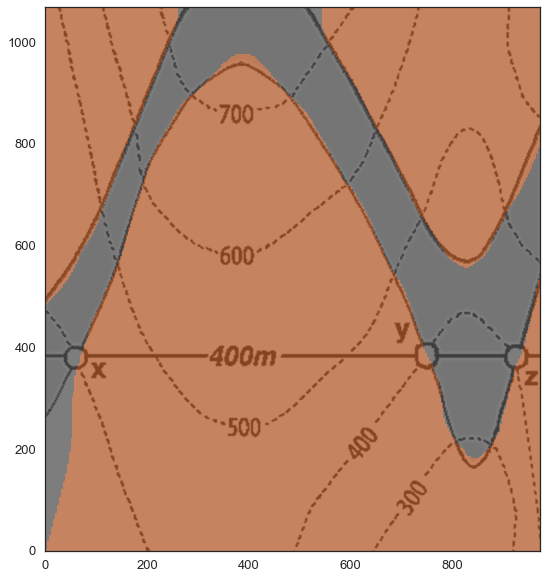

In [42]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
geolmap = geo_model.solutions.geological_map[0].reshape(shape)
cols = ['#b35a2a','#525252','#b35a2a' ]
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
gmap = np.rot90(geolmap,1)
plt.imshow(gmap, extent=geo_data.extent[:4], alpha=0.75, cmap=ListedColormap(cols))

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


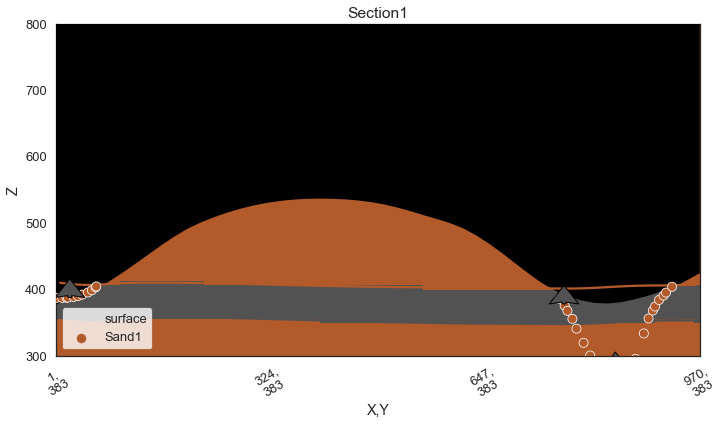

In [43]:
gp.plot_2d(geo_model, section_names=['Section1'], show_topography=True)

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


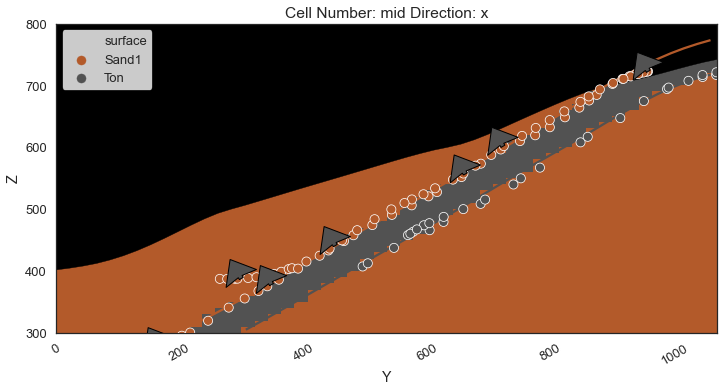

In [44]:
gp.plot_2d(geo_model, direction='x', show_topography=True)

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


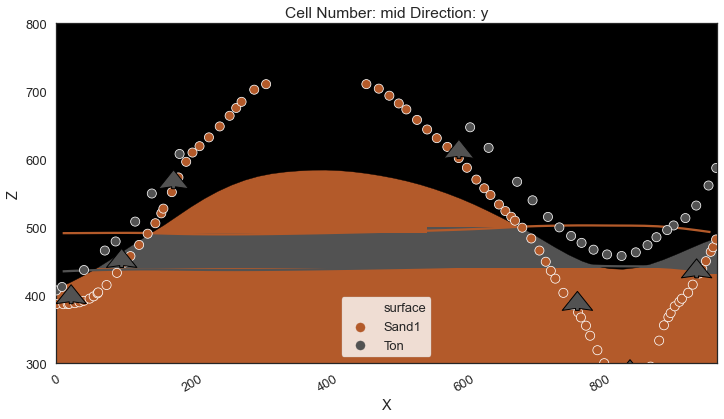

In [45]:
gp.plot_2d(geo_model, direction='y', show_topography=True)

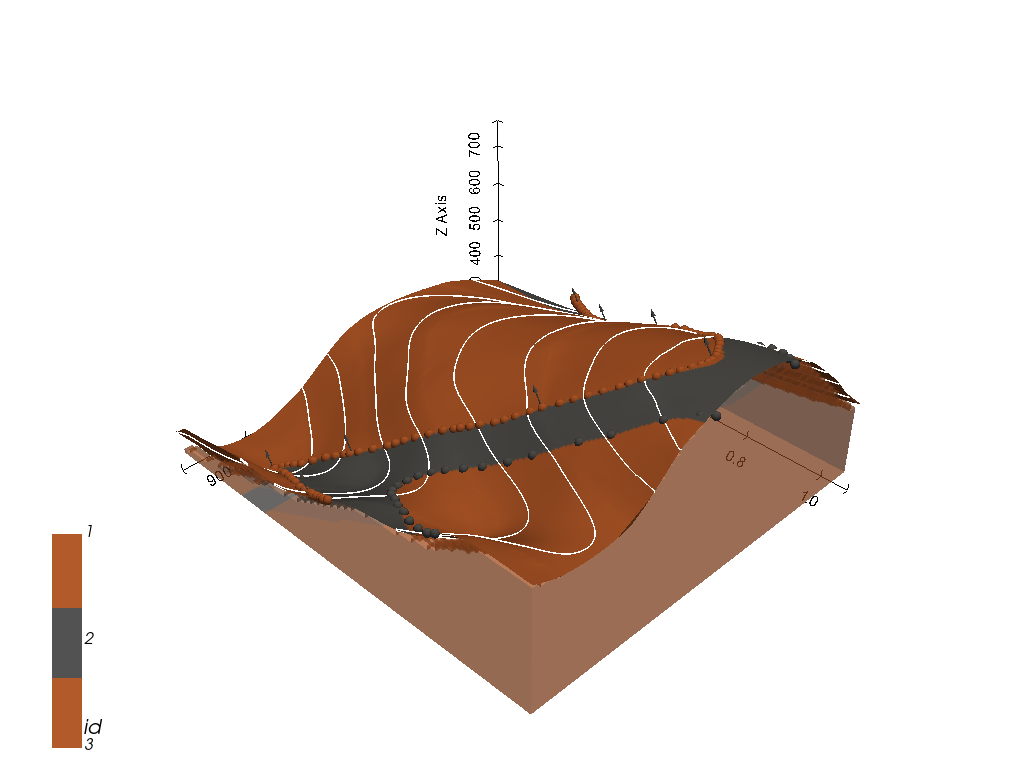

In [46]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=True)

# Postprocessing - Converting Geological Map to Shape Files

## Create GeoDataFrame with Polygons

In [47]:
gdf = gg.post.extract_lithologies(geo_model, geo_data.extent[:4], geo_data.crs)
gdf

formation                                           geometry
0  basement  POLYGON ((3.275 487.853, 5.832 490.003, 7.831 ...
1  basement  POLYGON ((826.200 557.320, 830.088 557.545, 83...
2       Ton  POLYGON ((2.406 5.831, 3.498 9.718, 4.586 13.6...
3     Sand1  POLYGON ((5.832 1.944, 9.720 1.944, 13.608 1.9...

## Plot Polygons

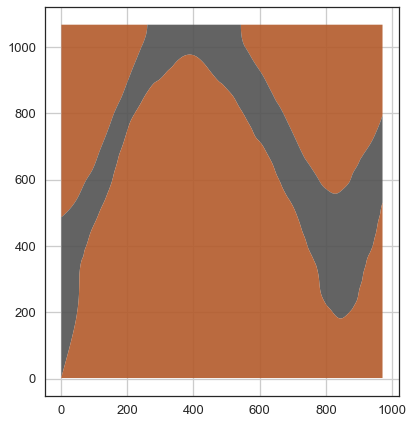

In [48]:
gdf.plot(column='formation', cmap=ListedColormap(cols), alpha=0.9)
plt.grid()

## Save Polygons as Shape Files

These polygons can now be saved as shape files and displayed for example as in QGIS shown below. 

In [49]:
gdf.to_file('../../../gemgis/data/examples/example1/liths.shp')

## Save Polygons as GeoTiff

Rasters like DEMs can be saved as georeferenced tif-files. The same can be done with the geological map obtained from `GemPy` by saving the array of the geological map as tif. 

In [50]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example1/geolmap.tif',gmap, extent=geo_data.extent, crs='EPSG:4326')